In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns  #
%matplotlib inline

In [16]:

df = pd.read_csv(r".\data\housePrice.csv")   # Read cvs from  \data folder and write in df DataFrame
df = df.rename(columns = {'Price(USD)' : 'Price_USD' })
df.head()   

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,63.0,1,True,True,True,Shahran,61666.67
1,60.0,1,True,True,True,Shahran,61666.67
2,79.0,2,True,True,True,Pardis,18333.33
3,95.0,2,True,True,True,Shahrake Qods,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,233333.33


In [3]:
df.isnull().sum() # shows number of null column

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price_USD     0
dtype: int64

In [17]:
# clean data
df = df.dropna()                                          # Separating NaN columns rows
df = df.query('Area < 2000 & Area > 10', inplace = False) # Separating Areas larger than 10 less Than 1000 from a DataFrame
df = df.query('Room < 10', inplace = False) # Separating Room Larger Than 0 and less than 10 from a DataFrame
df = df[(df.Parking == False) | (df.Parking == True)]     # Discard data with incorrect parking specifications (neither true nor false)
df = df[(df.Warehouse == False) | (df.Warehouse == True)] # Discard data with incorrect Warehouse specifications (neither true nor false)
df = df[(df.Elevator == False) | (df.Elevator == True)]   # Discard data with incorrect Elevator specifications (neither true nor false)
df = df.query('Price_USD > 1000', inplace = False) # Separating Price_USD Less Than 1000 from a DataFrame
df['Price_USD'] = df['Price_USD'].div(df['Area'])
df["address_code"], uniques = pd.factorize(df["Address"]) # Suppose df is your DataFrame with a column 'address'
mapping = dict(enumerate(uniques))   # Optionally store the mapping
#df = df.drop('Address', axis=1)

df

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD,address_code
0,63.0,1,True,True,True,Shahran,978.836032,0
1,60.0,1,True,True,True,Shahran,1027.777833,0
2,79.0,2,True,True,True,Pardis,232.067468,1
3,95.0,2,True,True,True,Shahrake Qods,316.666632,2
4,123.0,2,True,True,True,Shahrake Gharb,1897.018943,3
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,1356.589186,16
3475,83.0,2,True,True,True,Niavaran,2730.923735,78
3476,75.0,2,False,False,False,Parand,162.222267,27
3477,105.0,2,True,True,True,Dorous,1777.777810,46


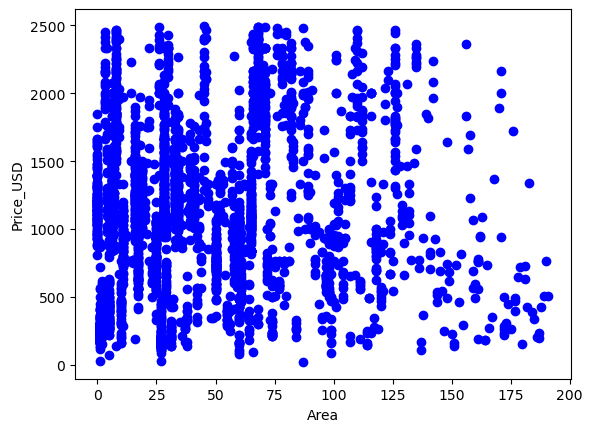

In [18]:
#dff = df.groupby("Area", as_index=False).mean('Price_USD')
df = df.query("Price_USD < 2500", inplace = False) # Separating Areas larger than 10 less Than 1000 from a DataFrame
plt.scatter(df.address_code, df.Price_USD,  color='blue') # 80% data
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()
#dff = df.query("Price_USD < 6000", inplace = False)
#dff
#df.loc[df.Address.isin(dff.Address), ['Price_USD']] = dff[['Price_USD']]
#df.head(20)

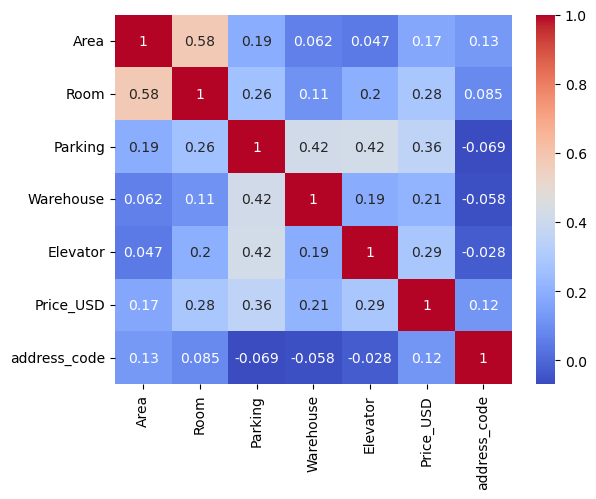

In [20]:
dfff=df.drop('Address', axis=1)

sns.heatmap(dfff.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
dff = df.query('address_code == 76', inplace = False)
#dff


In [8]:
max_area = df.loc[df['Area'].idxmax()]
max_room = df.loc[df['Room'].idxmax()]
max_address_code = df.loc[df['address_code'].idxmax()]
max_price = df.loc[df['Price_USD'].idxmax()]

#df['Area'] = df['Area'].div(max_area['Area'])  # divide/scale Area
#df['Room'] = df['Room'].div(max_room['Room'])  # divide/scale Room
#df['address_code'] = df['address_code'].div(max_address_code['address_code'])  # divide/scale address_code
#df['Price_USD'] = df['Price_USD'].div(max_price['Price_USD'])  # divide/scale address_code
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD,address_code
430,400.0,5,True,True,False,Lavasan,7083.333325,93
440,300.0,3,True,True,True,Niavaran,6166.666667,78
464,300.0,3,True,True,True,Farmanieh,6166.666667,26
565,170.0,2,True,True,True,Zaferanieh,6274.509824,76
1323,231.0,3,True,True,True,Zaferanieh,6233.333333,76
1332,350.0,4,True,True,True,Niavaran,7666.666657,78
1415,240.0,3,True,True,True,Velenjak,6388.888875,14
1565,238.0,3,True,True,True,Velenjak,6568.627437,14
1635,287.0,5,True,True,False,Vanak,6678.281080,140
1707,420.0,4,True,True,True,Zaferanieh,7333.333333,76


In [9]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Lavasan'

In [ ]:
# mask for Area
msk = np.random.rand(len(df)) < 0.8
train = df[msk]     # mask for 80%
test = df[~msk]     #mask for 20%

In [ ]:
plt.scatter(train.address_code, train.Price_USD,  color='blue') # 80% data
plt.xlabel("address_code")
plt.ylabel("Price_USD")
plt.show()

In [ ]:
sns.scatterplot(x='address_code', y='Price_USD', data=train)
plt.show()

In [ ]:

from sklearn import linear_model     # import linear models from sklearn. Read https://scikit-learn.org/stable/ for learn more
regr = linear_model.LinearRegression()        # linear model -- Regression
train_x = np.asanyarray(train[['address_code']])      # data to x array
train_y = np.asanyarray(train[['Price_USD']])    # data to y array
regr.fit (train_x, train_y)                         # Regression tetas Calculation
# The coefficients
print ('Coefficients: ', regr.coef_)     # teta0
print ('Intercept: ',regr.intercept_)    # teta1

In [ ]:

plt.scatter(train.address_code, train.Price_USD, color='blue') # scatter from train ENGINESIZE and CO2EMISSIONS blue color 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')  # draw a line teta1x + teta0
plt.xlabel("address_code")
plt.ylabel("Price_USD")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['address_code']])         # Test array x
test_y = np.asanyarray(test[['Price_USD']])       # Test array y
test_y_ = regr.predict(test_x)                       # predicted y 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))     
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )     # Result is bad.

In [ ]:
# mask for Area
msk = np.random.rand(len(df)) < 0.8
train = df[msk]     # mask for 80%
test = df[~msk]     #mask for 20%

In [ ]:
plt.scatter(train.Area, train.Price_USD,  color='blue') # 80% data
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

In [ ]:
plt.scatter(train.Room, train.Price_USD,  color='blue') # 80% data
plt.xlabel("Room")
plt.ylabel("Price_USD")
plt.show()

In [ ]:
plt.scatter(train.address_code, train.Price_USD,  color='blue') # 80% data
plt.xlabel("Address")
plt.ylabel("Price_USD")
plt.show()